# Project: Wrangling and Analyzing Weratedogs Twitter Data

## Table of Content
<li><a href='#introduction'>Introduction</a></li>
<li><a href='#gathering'>Data Gathering</a></li>
<li><a href='#assessing'>Assessing Data</a></li>
<li><a href='#cleaning'>Cleaning Data</a></li>
<li><a href='#analyzing'>Analyzing and Visualizing Data</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<a id='introduction'></a>
## Introduction

In this project we will be gathering data from a different of sources and in various formats, assess its quality and tidiness, then clean it. We will then analyze the cleaned data to get useful insights from it. The dataset that we will be using for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This is a Twitter account that rates people's dogs with a humorous comment about the dog. We will finding dog species with the most twitter engagement and other insights that could be gotten during the analysis process.

<a id='gathering'></a>
## Data Gathering
In this section we are going to;
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) which will be downloaded from udacity classroom
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

We would start by importing the required libraries

In [10]:
import pandas as pd

In [11]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Download the tweet image prediction (image_predictions.tsv) using request library

In [12]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
r.headers.get('content-type')
open('img_prediction.tsv', 'wb').write(r.content)

335079

In [13]:
img_prediction_df=pd.read_table('img_prediction.tsv')
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Query additional data(retweet count and favorite count) via the Twitter API using tweepy (tweet_json.txt)

In [14]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
import tweepy
from tweepy import OAuth1UserHandler
import json


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [15]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}

with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet =api.get_status(tweet_id)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print(e)
#             print(e.message)
            fails_dict[tweet_id] = e
            pass


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
404 Not Found
144 - No status found with that ID.
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 88

Success
247: 845677943972139009
Success
248: 845459076796616705
404 Not Found
144 - No status found with that ID.
249: 845397057150107648
Success
250: 845306882940190720
Success
251: 845098359547420673
Success
252: 844979544864018432
Success
253: 844973813909606400
Success
254: 844704788403113984
404 Not Found
144 - No status found with that ID.
255: 844580511645339650
Success
256: 844223788422217728
Success
257: 843981021012017153
Success
258: 843856843873095681
Success
259: 843604394117681152
Success
260: 843235543001513987
Success
261: 842892208864923648
404 Not Found
144 - No status found with that ID.
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
27

Success
494: 813202720496779264
Success
495: 813187593374461952
Success
496: 813172488309972993
Success
497: 813157409116065792
Success
498: 813142292504645637
Success
499: 813130366689148928
Success
500: 813127251579564032
Success
501: 813112105746448384
Success
502: 813096984823349248
Success
503: 813081950185472002
Success
504: 813066809284972545
Success
505: 813051746834595840
Success
506: 812781120811126785
Success
507: 812747805718642688
404 Not Found
144 - No status found with that ID.
508: 812709060537683968
Success
509: 812503143955202048
Success
510: 812466873996607488
Success
511: 812372279581671427
Success
512: 811985624773361665
Success
513: 811744202451197953
Success
514: 811647686436880384
Success
515: 811627233043480576
Success
516: 811386762094317568
Success
517: 810984652412424192
Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 80980889296853401

Success
748: 779834332596887552
Success
749: 779377524342161408
Success
750: 779124354206535695
Success
751: 779123168116150273
404 Not Found
144 - No status found with that ID.
752: 779056095788752897
Success
753: 778990705243029504
Success
754: 778774459159379968
Success
755: 778764940568104960
Success
756: 778748913645780993
Success
757: 778650543019483137
Success
758: 778624900596654080
Success
759: 778408200802557953
Success
760: 778396591732486144
Success
761: 778383385161035776
Success
762: 778286810187399168
Success
763: 778039087836069888
Success
764: 778027034220126208
Success
765: 777953400541634568
Success
766: 777885040357281792
Success
767: 777684233540206592
Success
768: 777641927919427584
Success
769: 777621514455814149
Success
770: 777189768882946048
Success
771: 776819012571455488
Success
772: 776813020089548800
Success
773: 776477788987613185
Success
774: 776249906839351296
Success
775: 776218204058357768
Success
776: 776201521193218049
Success
777: 77611330565618892

Rate limit reached. Sleeping for: 216


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
11

Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
14

Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
1614: 685315239903100929
Success
1615: 685307451701334016
Success
1616: 685268753634967552
Success
1617: 685198997565345792
Success
1618: 685169283572338688
Success
1619: 684969860808454144
Success
1620: 684959798585110529
Success
1621: 684940049151070208
Success
1622: 684926975086034944
Success
1623: 684914660081053696
Success
1624: 684902183876321280
Success
1625: 684880619965411328
Success
1626: 684830982659280897
Success
1627: 684800227459624960
Success
1628: 684594889858887680
Success
1629: 684588130326986752
Success
1630: 684567543613382656
Success
16

Rate limit reached. Sleeping for: 154


Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
18

Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
20

Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
23

In [16]:
# Extract retweet and favourite count from tweet_json.txt
file1 = open('tweet_json.txt', 'r')
Lines = file1.readlines()

tweet_id=[]
retweet_count=[]
favorite_count=[]
boolean=[]
for i in Lines:
    data = json.loads(i)
    tweet_id.append(data['id'])
    retweet_count.append(data['retweet_count'])
    favorite_count.append(data['favorite_count'])

In [22]:
# Create new dataframe for the extracted data
tweet_data=pd.DataFrame({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})   
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
1,892177421306343426,5302,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7763,35313
...,...,...,...
2318,666049248165822465,37,89
2319,666044226329800704,115,247
2320,666033412701032449,36,100
2321,666029285002620928,39,112


<a id='assessing'></a>
## Assessing Data
In this section, we will visually and programatically assess the gathered data for quality and tidiness issues. Let's start with **twitter-archive-enhanced.csv** data.



In [203]:
# Load twitter-archive-enhanced.csv data
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Assessing the data visually, We observe there are missing values in the following columnns;
1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id
5. retweeted_status_timestamp

We also observe that in the 'name' column we have dog name as 'a' which seems to not be right as the corresponding tweet text doesnt have a name.

The dog categories can be fused to one column 'dog category' to make it for tidy
 

We will then assess programatically, starting with info function.

In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Datetime column has a wrong datatype, it should be a datetime
The dog category has no missing value but from the visual assessment, we see None values

We could also confirm that there are missing values in the columns observed visuallly.


In [202]:
# Summary statistics of all attributes in the twitter_archive dataframe.
twitter_archive.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356,2356.0
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2,NaN
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None,NaN
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326,NaN
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN,inf
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN,1.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN,1.1
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN,1.2


**name** has missing values of about 745,**rating_numerator** and **rating_denominator** seem to have out of range maximum values of 1776 and 170 respectively
we will check the distribution of their values using value_counts.

In [66]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

We can confirm that we have quite a number of dog with no names as well as names with 'a'.

##### create a column for rating which will be gotten by dividing rating_numerator and rating_denominator and then check the distribution.

In [57]:
twitter_archive['rating']=twitter_archive['rating_numerator']/twitter_archive['rating_denominator']

In [58]:
twitter_archive['rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        2
7.500000        2
1.500000        2
42.000000       2
0.818182        2
177.600000      1
0.636364        1
1.250000        1
0.733333        1
2.700000        1
3.428571        1
inf             1
18.200000       1
66.600000       1
1.700000        1
2.600000        1
Name: rating, dtype: int64

Some ratings seems to be out of range, like 177.6,66.6, amongst others.

#### Assessing **img_prediction.tsv** data

In [201]:
# Reading the img_prediction.tsv data
img_prediction_df=pd.read_table('img_prediction.tsv')
img_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Looking at the data, we can observe that;
- The closest prediction, p1, shows that some prediction is false meaning, the image doesnt depict a dog
- The number of rows present here is 2075 which is lesser than the twitter-enhanced data and shows some missing predictions for the tweet IDs given in the twitter enhanced data. 
- p1 should be given a more comprehensive name like predicted dog specie.

We can confirm these programmatically by using the describe function

In [53]:
img_prediction_df.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


Assesing programmatically confirms that p1_dog have about 500 False values for dogs.

#### Assessing  **tweet_data** dataframe holding the extracted retweet count and favorite count

In [50]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
1,892177421306343426,5302,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7763,35313
...,...,...,...
2318,666049248165822465,37,89
2319,666044226329800704,115,247
2320,666033412701032449,36,100
2321,666029285002620928,39,112


- We observe 2323 rows which is less than twitter enhanced data that was used to extract these data. It could be as a results of deleted tweets.

In [56]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2323 non-null   int64
 1   retweet_count   2323 non-null   int64
 2   favorite_count  2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


<a id='q-issues'></a>
### Quality issues

###### In twitter-archive-enhanced.csv;
1. missing values in the following columnns;
   - in_reply_to_status_id
   - in_reply_to_user_id
   - retweeted_status_id
   - retweeted_status_user_id
   - retweeted_status_timestamp
   

2. 'name' column have dog name as 'a' which is not a name


3. timestamp column has a wrong datatype, it should be a datetime


4. The dog category have missing values.


5. Some ratings seems to be outliers like 177.6,66.6, amongst others.

###### In img_prediction.tsv;

6. The closest prediction, p1, shows that some prediction is false meaning, the image doesnt depict a dog


7. The number of rows present here is 2075 which is lesser than the twitter-enhanced data and shows some missing predictions for the tweet IDs given in the twitter enhanced data. 


8. p1 should be given a more comprehensive name like predicted dog specie.

###### In tweet_data;

9. We observe 2323 rows which is less than twitter enhanced data that was used to extract these data. It could be as a results of deleted tweets.



<a id='t-issues'></a>
### Tidiness issues
###### In twitter-archive-enhanced.csv;
10. The dog categories should be fused to one column to make it for tidy

11. The date should be seperated from time in the date column

<a id='cleaning'></a>
## Cleaning Data
In this section we will be cleaning, the data based on the gathered issues in the assessing data section.

In [77]:
twitter_archive_clean = twitter_archive.copy()
img_prediction_df_clean = img_prediction_df.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: missing values in the following columnns;
   - in_reply_to_status_id
   - in_reply_to_user_id
   - retweeted_status_id
   - retweeted_status_user_id
   - retweeted_status_timestamp

#### Define: 
The columns are not useful for the purpose of the analysis. Also the missing values are of high percentage, hence the columns will be dropped 

#### Code

###### Dropping columns with high missing values

In [85]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test
Checking the top 3 rows of the data to check to see if columns have been dropped

In [197]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None


### Issue #2: 'name' column have dog name as 'a' which is not a name

#### Define: 
We can replace the dog names with 'a' to 'None' since the corresponding tweet text has no names for them 

#### Code

###### Replacing rows with dog names as 'a'

In [79]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(['a'],'None')

#### Test
Checking if dog name 'a' will appear in the value counts

In [80]:
twitter_archive_clean['name'].value_counts()

None          800
Charlie        12
Cooper         11
Lucy           11
Oliver         11
             ... 
Aqua            1
Chase           1
Meatball        1
Rorie           1
Christoper      1
Name: name, Length: 956, dtype: int64

### Issue #3: timestamp column has a wrong datatype, it should be a datetime

#### Define: 
The datatype should be changed from object to datetime 

#### Code
Changing timestamp column datatype to datetime

In [81]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test
##### Checking the basic infomation about the data to check for the datatypes of the columns

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #4 & 10:The dog category have missing values and the columns should be fused to give a column.

#### Define: 
We will fuse the columns together and check for the missing values. The dog category is quite important for analysis so we will be leaving the column and the analysis will done with it based on the available data. 

#### Code

In [83]:
# Extract dog category from tweet text
dog_category=[]
for i in twitter_archive_clean['text']:
    i=i.lower()
    if 'doggo' in i:
        dog_category.append('doggo')
    elif 'puppo' in i:
        dog_category.append('puppo')
    elif 'floofer' in i:
        dog_category.append('floofer')
    elif 'pupper' in i:
        dog_category.append('pupper')
    else:
        dog_category.append('None')

# Create a dog category column
twitter_archive_clean['dog_category']=dog_category

# Drop previous dog category columns
twitter_archive_clean = twitter_archive_clean.drop(['floofer','puppo','pupper','doggo'], axis = 1)

#### Test

In [198]:
# Check the head of the data to confirm the new column and the dropped columns
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,None


### Issue #5: Some ratings seems to be outliers like 177.6,66.6, amongst others.

#### Define: 
We will check the distribution og the rating column using value counts and replace ratings with high values to the expected maximum values. 

#### Code

In [87]:
# View rating distribution
twitter_archive_clean['rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        2
7.500000        2
1.500000        2
42.000000       2
0.818182        2
177.600000      1
0.636364        1
1.250000        1
0.733333        1
2.700000        1
3.428571        1
inf             1
18.200000       1
66.600000       1
1.700000        1
2.600000        1
Name: rating, dtype: int64

##### We would replace ratings above 2.0 with 1.7 and also replace the infinity value with 1.7

In [88]:
twitter_archive_clean.loc[twitter_archive_clean['rating'] > 2.0, 'rating'] = 1.7

#### Test

In [89]:
# View new rating distribution
twitter_archive_clean['rating'].value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
1.400000     54
0.700000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
1.700000     12
0.200000     11
0.100000      8
0.818182      2
1.500000      2
0.000000      2
0.636364      1
0.733333      1
1.250000      1
Name: rating, dtype: int64

### Issue #6: The closest prediction, p1, shows that some prediction is false meaning, the image doesn't depict a dog.

#### Define: 
We will be using the closest prediction columns in our analysis, and we will drop rows that p1_dog is false. 

#### Code

##### Filter and get data by predictions which are dogs

In [91]:

img_prediction_df_clean=img_prediction_df_clean[img_prediction_df_clean['p1_dog']==True]

#### Test

In [92]:
# Confirm data is only for dog prediction by checking the unique values in the column
img_prediction_df_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #7: The number of rows present in image prediction file is lesser than the twitter-enhanced data.

#### Define: 
Merging both dataframe based on tweet IDs present in both. 

#### Code
Merge 'twitter_archive_clean' and 'img_prediction_df_clean' dataframes

In [96]:
NewTwitterEnhanced = twitter_archive_clean.merge(img_prediction_df_clean[['tweet_id', 'p1', 'p1_conf']])

#### Test

In [97]:
NewTwitterEnhanced

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category,p1,p1_conf
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None,Chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,None,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,1.3,None,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,None,Appenzeller,0.341703
...,...,...,...,...,...,...,...,...,...,...,...,...
1527,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,0.5,None,miniature_pinscher,0.560311
1528,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,0.6,None,Rhodesian_ridgeback,0.408143
1529,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,0.9,None,German_shepherd,0.596461
1530,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,0.7,None,redbone,0.506826


### Issue #8: p1 and p1_conf  should be given a more comprehensive names.

#### Define: 
Renaming both columns to dog_specie and prediction_confidence respectively. 

#### Code

In [98]:
# Rename p1 and p1_conf columns to dog_specie and prediction_confidence respectively
NewTwitterEnhanced.rename(columns = {'p1':'dog_specie', 'p1_conf':'prediction_confidence'}, inplace = True)

#### Test

In [100]:
# Confirm renamed columns 

NewTwitterEnhanced.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating',
       'dog_category', 'dog_specie', 'prediction_confidence'],
      dtype='object')

### Issue #9: tweet_data rows is less than twitter enhanced data that was used to extract these data.

#### Define: 
Merging **NewTwitterEnhanced** and **tweet_data** dataframes based on tweet IDs present in both and dropping columns with little values. 

#### Code

###### Merge prediction_confidence and tweet_data dataframes

In [102]:

MasterTwitterEnhanced  = NewTwitterEnhanced.merge(tweet_data)

# Drop columns not needed in the new MasterTwitterEnhanced dataframe
MasterTwitterEnhanced = MasterTwitterEnhanced.drop(['source','expanded_urls','rating_numerator','rating_denominator'], axis = 1)

#### Test

In [103]:
# Checking the new merged dataframe 
MasterTwitterEnhanced

,tweet_id,timestamp,text,name,rating,dog_category,dog_specie,prediction_confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,Chihuahua,0.323581,5302,29336
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,Chihuahua,0.716012,3481,22060
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,basset,0.555712,7763,35313
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,None,1.3,None,Chesapeake_Bay_retriever,0.425595,2602,17815
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,None,Appenzeller,0.341703,1664,10369
...,...,...,...,...,...,...,...,...,...,...
1512,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,None,0.5,None,miniature_pinscher,0.560311,37,89
1513,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,None,0.6,None,Rhodesian_ridgeback,0.408143,115,247
1514,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,None,0.9,None,German_shepherd,0.596461,36,100
1515,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,None,0.7,None,redbone,0.506826,39,112


### Issue #11: The date should be seperated from time in the timestamp column.

#### Define: 
Remove date drom timestamp column. 

#### Code

###### Create new column that takes only the dates from the timestamp column

In [107]:
MasterTwitterEnhanced['date'] = MasterTwitterEnhanced['timestamp'].dt.date

# Drop timestamp column
MasterTwitterEnhanced = MasterTwitterEnhanced.drop(['timestamp'], axis = 1)

#### Test

###### Confirm the new date column has been effected

In [108]:
MasterTwitterEnhanced

,tweet_id,text,name,rating,dog_category,dog_specie,prediction_confidence,retweet_count,favorite_count,date
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,Chihuahua,0.323581,5302,29336,2017-08-01
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,Chihuahua,0.716012,3481,22060,2017-07-31
2,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,basset,0.555712,7763,35313,2017-07-29
3,891087950875897856,Here we have a majestic great white breaching ...,None,1.3,None,Chesapeake_Bay_retriever,0.425595,2602,17815,2017-07-29
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,None,Appenzeller,0.341703,1664,10369,2017-07-28
...,...,...,...,...,...,...,...,...,...,...
1512,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,None,0.5,None,miniature_pinscher,0.560311,37,89,2015-11-16
1513,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,None,0.6,None,Rhodesian_ridgeback,0.408143,115,247,2015-11-16
1514,666033412701032449,Here is a very happy pup. Big fan of well-main...,None,0.9,None,German_shepherd,0.596461,36,100,2015-11-15
1515,666029285002620928,This is a western brown Mitsubishi terrier. Up...,None,0.7,None,redbone,0.506826,39,112,2015-11-15


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [111]:
MasterTwitterEnhanced.to_csv("twitter_archive_master.csv",index=False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, analysis and visualization of the wrangled data will be done.

In [176]:
# Top 25 frequent occuring dog species

k=MasterTwitterEnhanced.dog_specie.value_counts()[:25].index.tolist()

###### Create column for Average engagement

In [ ]:
MasterTwitterEnhanced['avrg_engagement']=(MasterTwitterEnhanced['retweet_count']+MasterTwitterEnhanced['favorite_count'])/2

In [183]:
newDf = MasterTwitterEnhanced["dog_specie"].isin(k)
MasterTwitterEnhanced[newDf]

,tweet_id,text,name,rating,dog_category,dog_specie,prediction_confidence,retweet_count,favorite_count,date,gender,avrg_engagement
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,Chihuahua,0.323581,5302,29336,2017-08-01,female,17319.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,Chihuahua,0.716012,3481,22060,2017-07-31,male,12770.5
3,891087950875897856,Here we have a majestic great white breaching ...,None,1.3,None,Chesapeake_Bay_retriever,0.425595,2602,17815,2017-07-29,none,10208.5
5,890729181411237888,When you watch your owner call another dog a g...,None,1.3,None,Pomeranian,0.566142,15757,56879,2017-07-28,male,36318.0
7,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,1.4,doggo,Pembroke,0.511319,6101,27965,2017-07-26,female,17033.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,666082916733198337,Here we have a well-established sunblockerspan...,None,0.6,None,pug,0.489814,37,93,2015-11-16,none,65.0
1508,666063827256086533,This is the happiest dog you will ever see. Ve...,the,1.0,None,golden_retriever,0.775930,180,400,2015-11-16,none,290.0
1510,666055525042405380,Here is a Siberian heavily armored polar bear ...,None,1.0,None,chow,0.692517,196,367,2015-11-16,none,281.5
1512,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,None,0.5,None,miniature_pinscher,0.560311,37,89,2015-11-16,none,63.0


###### Sort dog species according to their number of engagements

In [193]:
MasterTwitterEnhanced[new][['avrg_engagement','dog_specie']].groupby('dog_specie').mean().sort_values('avrg_engagement', ascending=False).style.background_gradient(cmap='copper')

,avrg_engagement
dog_specie,
French_bulldog,10140.620000
Eskimo_dog,8522.916667
Cardigan,7890.789474
Samoyed,7285.345238
golden_retriever,6500.483333
Labrador_retriever,6358.270833
Pembroke,6224.562500
cocker_spaniel,6111.050000
Chesapeake_Bay_retriever,5640.195652


French bulldog is the most liked dog as it has the highest engagement count

###### Find dog gender from tweet text and append to a list

In [185]:
gender=[]
b=MasterTwitterEnhanced['text']
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
female=['shes','she','girl']
male=['he','hes','boy']
for i in b:
    i=i.lower()
    for ele in i:
        if ele in punc:
            i = i.replace(ele, "")
    h=i.split(' ')
    checkf = any(item in female for item in h)
    checkm = any(item in male for item in h)
    if checkf == True:
        gender.append('female')
    elif checkm == True:
        gender.append('male')
    else:
        gender.append('none')
            

###### Create new column for gender 

In [186]:
MasterTwitterEnhanced['gender']=gender
MasterTwitterEnhanced.head()

,tweet_id,text,name,rating,dog_category,dog_specie,prediction_confidence,retweet_count,favorite_count,date,gender,avrg_engagement
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1.3,None,Chihuahua,0.323581,5302,29336,2017-08-01,female,17319.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,None,Chihuahua,0.716012,3481,22060,2017-07-31,male,12770.5
2,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,1.2,None,basset,0.555712,7763,35313,2017-07-29,male,21538.0
3,891087950875897856,Here we have a majestic great white breaching ...,None,1.3,None,Chesapeake_Bay_retriever,0.425595,2602,17815,2017-07-29,none,10208.5
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,None,Appenzeller,0.341703,1664,10369,2017-07-28,male,6016.5


###### Sort dog gender based on average number of engagement

In [188]:
newDf = MasterTwitterEnhanced["gender"].isin(['male','female'])
MasterTwitterEnhanced[newDf][['avrg_engagement','gender']].groupby('gender').mean().sort_values('avrg_engagement').style.background_gradient(cmap='copper')

,avrg_engagement
gender,
male,5203.894298
female,6018.062030


Female dogs are more liked compared to male dogs based on the engagement count.

###### Sort dog stages based on average number of engagement

In [189]:
newDf = MasterTwitterEnhanced["dog_category"].isin(['puppo','pupper','doggo','floofer'])
MasterTwitterEnhanced[newDf][['avrg_engagement','dog_category']].groupby('dog_category').mean().sort_values('avrg_engagement').style.background_gradient(cmap='copper')

,avrg_engagement
dog_category,
pupper,4424.885802
floofer,7607.928571
doggo,11812.379032
puppo,12813.608696


### Insights:
1. Eskimo dog is the most liked dog as it has the highest rating and retweet count and second highest favorite count

2. Female dogs are more liked compared to male dogs.

3. Top two liked dog stages are doggo and puppo based on engagement counts.

### Visualization

###### Represent  average number of engagement of dog species  on a bar plot

In [190]:
#Aggregate by mean engagement
new = MasterTwitterEnhanced["dog_specie"].isin(k)
g=MasterTwitterEnhanced[new][['avrg_engagement','dog_specie']].groupby('dog_specie').mean().sort_values('avrg_engagement')
g=g.reset_index()

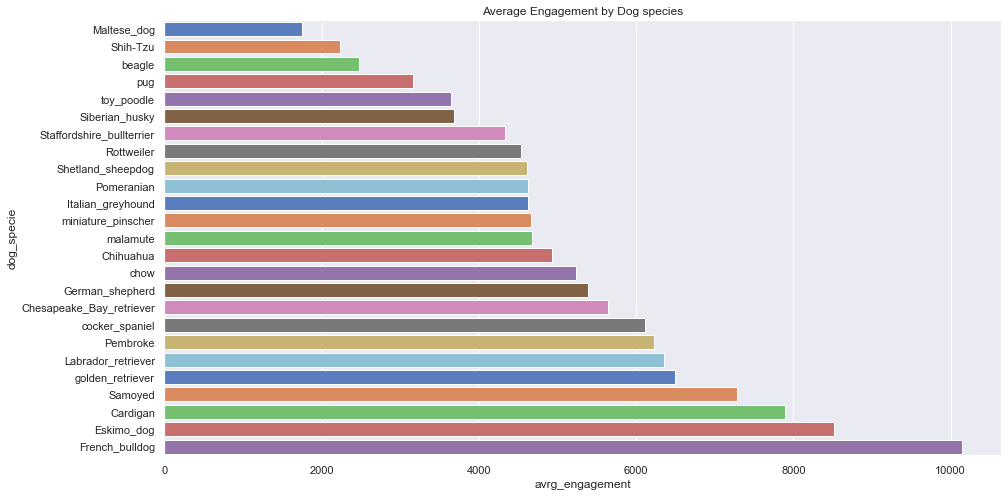

In [196]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 20)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="avrg_engagement", y="dog_specie", data=g, palette ='muted').set(title='Average Engagement by Dog species')

From the plot, we can further confirm that french bull dogs are the most liked based on engagement, Followed by Eskimo dogs.

## Conclusion

<a id='conclusion'></a>
From our analysis, it is gathered that, people engage tweets realted to french bulldogs the most and then eskimo dogs. This could be because of their adorability and cuteness. Also female dogs seems to be more liked and prefered to males. The doggo and puppo dog categories have more tweet engagement to the rests of the dog stages.

## Limitation

The analysis on the tweets would have shown more insight if there were more data provided. Twitter doesnt give out user informations, hence it was not easy drilling down insights to users. Alot of missing data that could not be filled out. Some columns meaning were not clear enough.